# Loading all Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import itertools

# Preprocessing

In [41]:
ap = pd.read_csv("auto_policies_2020.csv") # Reading the auto_policies_2020 CSV file and storing it in a dataframe named ap.
ap # Displaying ap

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


In [42]:
ap.isnull().sum() # Checking for missing data and displaying the sum of missing values for each column in auto_policies_2020 CSV file

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
dtype: int64

In [43]:
# Dropping "claim_office" column as it consists of more than 80 percent of null values and has no effect on customer risk levels determination.
# Dropping "veh_body" column as we have "veh_age" and "veh_value" columns which helps us in further segmentation.
# Dropping "pol_number" and "pol_eff_dt" columns as they don't have any effect on customer risk level segmentation.
# Dropping "annual_premium" column, as all the customers are subjected to pay the same amount.
# Dropping "area" and "traffic_index" columns, as they don't contribute to our objective which is to apply auto pricing based on the customers risk level.

ap_updated = ap.drop(['claim_office', 'veh_body', 'pol_number', 'pol_eff_dt', 'annual_premium', 'area', 'traffic_index'], axis = 1)
ap_updated

,gender,agecat,date_of_birth,credit_score,veh_age,veh_value,numclaims,claimcst0
0,F,4.0,7/12/1968,381.0,2,1.331,0,0.0
1,F,2.0,11/5/1982,549.0,1,3.740,0,0.0
2,M,2.0,11/26/1983,649.0,4,0.880,0,0.0
3,M,4.0,11/2/1960,743.0,3,1.045,0,0.0
4,F,4.0,1/4/1968,817.0,4,0.473,0,0.0
...,...,...,...,...,...,...,...,...
60387,F,5.0,5/10/1956,809.0,4,0.891,0,0.0
60388,M,4.0,3/22/1961,681.0,1,1.881,0,0.0
60389,M,4.0,9/29/1965,773.0,1,5.170,0,0.0
60390,M,3.0,8/1/1978,714.0,1,1.903,0,0.0


In [44]:
# Dropping all the null value rows and resetting the index.

ap_final = ap_updated.dropna()
ap_final = ap_final.reset_index(drop=True)
ap_final

,gender,agecat,date_of_birth,credit_score,veh_age,veh_value,numclaims,claimcst0
0,F,4.0,7/12/1968,381.0,2,1.331,0,0.0
1,F,2.0,11/5/1982,549.0,1,3.740,0,0.0
2,M,2.0,11/26/1983,649.0,4,0.880,0,0.0
3,M,4.0,11/2/1960,743.0,3,1.045,0,0.0
4,F,4.0,1/4/1968,817.0,4,0.473,0,0.0
...,...,...,...,...,...,...,...,...
52984,F,3.0,8/2/1977,755.0,4,2.310,0,0.0
52985,F,5.0,5/10/1956,809.0,4,0.891,0,0.0
52986,M,4.0,3/22/1961,681.0,1,1.881,0,0.0
52987,M,4.0,9/29/1965,773.0,1,5.170,0,0.0


In [45]:
# Changing the dtype of "date_of_birth" column from object to datetime.
# Extracting the year from "date_of_birth" column to later use it for customer age categorization.
# Dropping the "date_of_birth" from final cleaned dataset.

ap_final['date_of_birth'] = pd.to_datetime(ap_final['date_of_birth'])
ap_final['year'] = pd.DatetimeIndex(ap_final['date_of_birth']).year
ap_final = ap_final.drop(['date_of_birth'],axis=1)
ap_final

,gender,agecat,credit_score,veh_age,veh_value,numclaims,claimcst0,year
0,F,4.0,381.0,2,1.331,0,0.0,1968
1,F,2.0,549.0,1,3.740,0,0.0,1982
2,M,2.0,649.0,4,0.880,0,0.0,1983
3,M,4.0,743.0,3,1.045,0,0.0,1960
4,F,4.0,817.0,4,0.473,0,0.0,1968
...,...,...,...,...,...,...,...,...
52984,F,3.0,755.0,4,2.310,0,0.0,1977
52985,F,5.0,809.0,4,0.891,0,0.0,1956
52986,M,4.0,681.0,1,1.881,0,0.0,1961
52987,M,4.0,773.0,1,5.170,0,0.0,1965


In [46]:
# Creating a new column called "age_division" based on "year" column
# 1 for younger people (people below 40 years of age) and 2 for older people (people above 40 years of age).

ap_final['age_division'] = [1 if x in range(1960,1999) else 2 for x in ap_final['year']]
ap_final = ap_final.drop(['year'],axis=1)
ap_final

,gender,agecat,credit_score,veh_age,veh_value,numclaims,claimcst0,age_division
0,F,4.0,381.0,2,1.331,0,0.0,1
1,F,2.0,549.0,1,3.740,0,0.0,1
2,M,2.0,649.0,4,0.880,0,0.0,1
3,M,4.0,743.0,3,1.045,0,0.0,1
4,F,4.0,817.0,4,0.473,0,0.0,1
...,...,...,...,...,...,...,...,...
52984,F,3.0,755.0,4,2.310,0,0.0,1
52985,F,5.0,809.0,4,0.891,0,0.0,2
52986,M,4.0,681.0,1,1.881,0,0.0,1
52987,M,4.0,773.0,1,5.170,0,0.0,1


In [47]:
# Displaying the ap_final dataframe info

ap_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52989 entries, 0 to 52988
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        52989 non-null  object 
 1   agecat        52989 non-null  float64
 2   credit_score  52989 non-null  float64
 3   veh_age       52989 non-null  int64  
 4   veh_value     52989 non-null  float64
 5   numclaims     52989 non-null  int64  
 6   claimcst0     52989 non-null  float64
 7   age_division  52989 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ MB


# One-hot encoding

In [48]:
# Creating instance of one-hot-encoder.
# Encoding categorical columns to numeric columns.

encoder = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(encoder.fit_transform(ap_final[['gender']]).toarray())
enc_df.columns = encoder.get_feature_names(['gender'])
enc_df

,gender_F,gender_M
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
52984,1.0,0.0
52985,1.0,0.0
52986,0.0,1.0
52987,0.0,1.0


In [49]:
# Merge with main dataframe ap_final on key values

ap_final_enc = ap_final.join(enc_df)
ap_final_enc

,gender,agecat,credit_score,veh_age,veh_value,numclaims,claimcst0,age_division,gender_F,gender_M
0,F,4.0,381.0,2,1.331,0,0.0,1,1.0,0.0
1,F,2.0,549.0,1,3.740,0,0.0,1,1.0,0.0
2,M,2.0,649.0,4,0.880,0,0.0,1,0.0,1.0
3,M,4.0,743.0,3,1.045,0,0.0,1,0.0,1.0
4,F,4.0,817.0,4,0.473,0,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52984,F,3.0,755.0,4,2.310,0,0.0,1,1.0,0.0
52985,F,5.0,809.0,4,0.891,0,0.0,2,1.0,0.0
52986,M,4.0,681.0,1,1.881,0,0.0,1,0.0,1.0
52987,M,4.0,773.0,1,5.170,0,0.0,1,0.0,1.0


In [50]:
# Dropping the gender column from final encoded dataframe and displaying the info

ap_final_enc = ap_final_enc.drop(['gender'], axis = 1)
ap_final_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52989 entries, 0 to 52988
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   agecat        52989 non-null  float64
 1   credit_score  52989 non-null  float64
 2   veh_age       52989 non-null  int64  
 3   veh_value     52989 non-null  float64
 4   numclaims     52989 non-null  int64  
 5   claimcst0     52989 non-null  float64
 6   age_division  52989 non-null  int64  
 7   gender_F      52989 non-null  float64
 8   gender_M      52989 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.6 MB


In [51]:
# Displaying the summary statistics for final encoded dataframe

ap_final_enc.describe()

,agecat,credit_score,veh_age,veh_value,numclaims,claimcst0,age_division,gender_F,gender_M
count,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000,52989.000000
mean,3.557663,662.417068,2.673177,1.951702,0.209326,632.922104,1.275095,0.568627,0.431373
std,1.410934,136.318658,1.067688,1.313225,0.546304,3361.665707,0.446566,0.495273,0.495273
min,1.000000,301.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,602.000000,2.000000,1.111000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,682.000000,3.000000,1.650000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,5.000000,772.000000,4.000000,2.365000,0.000000,0.000000,2.000000,1.000000,1.000000
max,6.000000,850.000000,4.000000,25.729000,5.000000,69478.897830,2.000000,1.000000,1.000000


# Scaling

In [52]:
# Define scaler

scaler = MinMaxScaler()

In [53]:
# Fit scaler

scaler.fit(ap_final_enc.values)

MinMaxScaler()

In [54]:
# transform data

ap_scaled = scaler.transform(ap_final_enc.values)

# print dataset properties before and after scaling

print("transformed shape: {}".format(ap_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(ap_final_enc.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(ap_final_enc.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(ap_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(ap_scaled.max(axis=0)))

# retaining column names 

ap_final_scaled = pd.DataFrame(ap_scaled,index=ap_final_enc.index, columns=ap_final_enc.columns)
ap_final_scaled

transformed shape: (52989, 9)
per-feature minimum before scaling:
 agecat            1.0
credit_score    301.0
veh_age           1.0
veh_value         0.0
numclaims         0.0
claimcst0         0.0
age_division      1.0
gender_F          0.0
gender_M          0.0
dtype: float64
per-feature maximum before scaling:
 agecat              6.00000
credit_score      850.00000
veh_age             4.00000
veh_value          25.72900
numclaims           5.00000
claimcst0       69478.89783
age_division        2.00000
gender_F            1.00000
gender_M            1.00000
dtype: float64
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]


,agecat,credit_score,veh_age,veh_value,numclaims,claimcst0,age_division,gender_F,gender_M
0,0.6,0.145719,0.333333,0.051732,0.0,0.0,0.0,1.0,0.0
1,0.2,0.451730,0.000000,0.145361,0.0,0.0,0.0,1.0,0.0
2,0.2,0.633880,1.000000,0.034203,0.0,0.0,0.0,0.0,1.0
3,0.6,0.805100,0.666667,0.040616,0.0,0.0,0.0,0.0,1.0
4,0.6,0.939891,1.000000,0.018384,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
52984,0.4,0.826958,1.000000,0.089782,0.0,0.0,0.0,1.0,0.0
52985,0.8,0.925319,1.000000,0.034630,0.0,0.0,1.0,1.0,0.0
52986,0.6,0.692168,0.000000,0.073108,0.0,0.0,0.0,0.0,1.0
52987,0.6,0.859745,0.000000,0.200941,0.0,0.0,0.0,0.0,1.0


# K-Means Clustering

In [55]:
# Applying Elbow method to find the best number of clusters
# Applying K-means to segment the data

Sum_of_squared_distances = [] # Define empty list to store results of for loop
K = range(2,10) # Indexing k from 2 to 10
for num_clusters in K : 
 kmeans = KMeans(n_clusters=num_clusters) # k-means clustering algorithm where we are iterating through num_clusters
 kmeans.fit(ap_final_scaled) # Fitting k-means clustering algorithm
 Sum_of_squared_distances.append(kmeans.inertia_) # Appending the Sum_of_squared_distances to the empty list.

In [56]:
results1 = pd.DataFrame({"k": range(2,10),"SSE/Inertia": Sum_of_squared_distances}) # Creating data frame of results
results1 # Displaying results

,k,SSE/Inertia
0,2,25573.608682
1,3,18547.632871
2,4,12533.171181
3,5,10373.606572
4,6,8743.504460
5,7,7989.880021
6,8,7253.690580
7,9,6665.437844


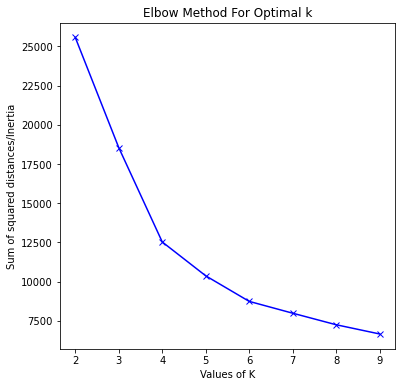

In [65]:
plt.figure(figsize=(6,6)) # defining figure size
plt.plot(K,Sum_of_squared_distances,"bx-") # Creating visualization to use elbow method
plt.xlabel("Values of K")  # x axis label
plt.ylabel("Sum of squared distances/Inertia") # y axis label
plt.title("Elbow Method For Optimal k") # title
plt.show() 

In [58]:
# Using the silhouette score metric to determine k

range_n_clusters = [3,4,5]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(ap_final_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    score = silhouette_score(ap_final_scaled, cluster_labels)
    silhouette_avg.append(score)
    
score

0.4548677906007592

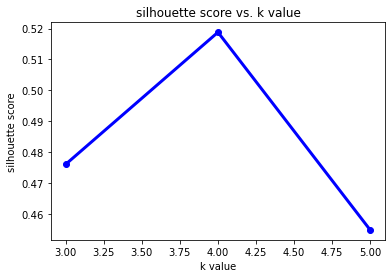

In [61]:
# Visualizing silhouette scores

plt.plot(range_n_clusters, silhouette_avg, linewidth = 3, color = "blue",marker='o')
plt.xlabel("k value") # x axis label
plt.ylabel("silhouette score") # y axis label
plt.title("silhouette score vs. k value"); # title

From the kmeans plot, using the elbow method, k = 4 is reasonable. Additionally, using the silhouette score metric, I notice that k = 4 is also reasonably good. Recall that the silhouette score goes from -1 to 1 with 1 being the best. As the elbow-method and silhouette score both agree on k = 4, I will choose k = 4 as the best 𝑘 value for clustering.

In [22]:
best_kmeans = KMeans(n_clusters = 4) # Return k-means algorithm to get the algorithm with the best k result we chose i.e. k = 4
best_kmeans.fit(ap_final_scaled)

KMeans(n_clusters=4)

In [23]:
# Creating a column in the original data with the corresponding clusters

ap_final['kmeans_clusters'] = best_kmeans.labels_ 
ap_final.sort_values('kmeans_clusters') # sort clusterings to easily read data frame
ap_final.groupby("kmeans_clusters").describe() # get summary statistics for each cluster.

agecat                                               \
                   count      mean       std  min  25%  50%  75%  max   
kmeans_clusters                                                         
0                 6961.0  5.284729  0.849075  1.0  5.0  5.0  6.0  6.0   
1                22515.0  2.911792  0.969528  1.0  2.0  3.0  4.0  4.0   
2                15897.0  2.913883  0.981238  1.0  2.0  3.0  4.0  4.0   
3                 7616.0  5.232274  0.880078  1.0  5.0  5.0  6.0  6.0   

                credit_score              ...   claimcst0               \
                       count        mean  ...         75%          max   
kmeans_clusters                           ...                            
0                     6961.0  714.093234  ...    0.000000  69478.89783   
1                    22515.0  642.043571  ...    0.000000  60571.21295   
2                    15897.0  642.037554  ...  176.328722  65306.53615   
3                     7616.0  717.953388  ...    0.000000  63226.12169   

                age_division                                     
                       count mean  std  min  25%  50%  75%  max  
kmeans_clusters                                                  
0                     6961.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
1                    22515.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2                    15897.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
3                     7616.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  

[4 rows x 56 columns]

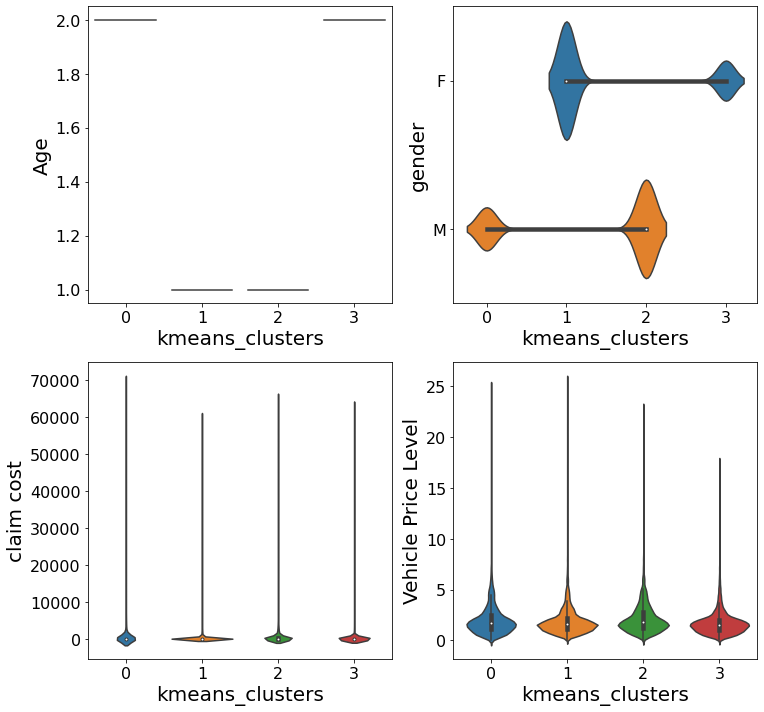

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (12,12)) # Create grid of subplots using Seaborn

ax = sns.violinplot(data = ap_final, x = "kmeans_clusters", y = "age_division", ax=axes[0,0]) # Define first plot
ax.set_xlabel('kmeans_clusters', fontsize = 20) # Parameters for first plot, making x label bigger
ax.set_ylabel('Age', fontsize = 20) # Parameters for first plot, making y label bigger
ax.tick_params(axis='x', labelsize=16)# Parameters for first plot, making x tick marks bigger
ax.tick_params(axis='y', labelsize=16)# Parameters for first plot, making y tick marks bigger

ax = sns.violinplot(data = ap_final, x = "kmeans_clusters", y = "gender", ax=axes[0,1])
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('gender', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax = sns.violinplot(data = ap_final, x = "kmeans_clusters", y = "claimcst0", ax=axes[1,0])
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('claim cost', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

ax = sns.violinplot(data = ap_final, x = "kmeans_clusters", y = "veh_value", ax=axes[1,1])
ax.set_xlabel('kmeans_clusters', fontsize = 20)
ax.set_ylabel('Vehicle Price Level', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

In [25]:
ap_final.groupby(['kmeans_clusters']).age_division.value_counts() # Displaying the summary statistics for gender

kmeans_clusters  age_division
0                2                6961
1                1               22515
2                1               15897
3                2                7616
Name: age_division, dtype: int64

In [26]:
ap_final.groupby(['kmeans_clusters']).gender.value_counts() # Displaying the summary statistics for gender

kmeans_clusters  gender
0                M          6961
1                F         22515
2                M         15897
3                F          7616
Name: gender, dtype: int64

In [27]:
ap_final.groupby(['kmeans_clusters']).claimcst0.sum() # Displaying the summary statistics for claim cost

kmeans_clusters
0    8.169522e+06
1    7.421505e+06
2    1.442938e+07
3    3.517505e+06
Name: claimcst0, dtype: float64

In [28]:
ap_final.groupby(['kmeans_clusters']).veh_value.sum() # Displaying the summary statistics for vehicle value

kmeans_clusters
0    13953.11489
1    42062.60927
2    34240.74346
3    13162.24569
Name: veh_value, dtype: float64

I interpreted the results from  𝑘 -means using the best  𝑘 . To interpret the results, I appended the cluster assignments to the original, unscaled dataset and performed summary statistics/visualizations on that.

Cluster 0 has older males (whose age is above 40 years), high claim cost history and low vehicle value.

Cluster 1 has younger females (whose age is below 40 years), high claim cost history and high vehicle value.

Cluster 2 has younger males (whose age is below 40 years), low claim cost history and median vehicle value.

Cluster 3 has older females (whose age is above 40 years), average claim cost history and low vehicle value.

Overall, K=4 can be considered as a best cluster number in this case.

# DBSCAN Clustering

In [29]:
# Applying DBSCAN algorithm to the same dataset for customer segmentation.

sil_score = [] # Create an empty list to store the silhouette score
num1_clusters = [] # Create an empty list to store the number of clusters

eps = [0.3,0.5,0.7] # randomly selecting the eps values
minpts = [8,16,24] # randomly selecting the mipts values

for ep, minpt in itertools.product(eps, minpts): # Using the itertools package to get every possible combination of eps and minpts
    db_clus = DBSCAN(eps = ep, min_samples = minpt).fit(ap_final_scaled) # Running DBSCAN while looping through ep and minpt
    if len(np.unique(db_clus.labels_)) == 1: # if statement which helps to have atleast 2 clusters, otherwise we append -1 as it defines the worst cluster
           sil_score.append(-1) 
    else: 
        sil_score.append(silhouette_score(ap_final_scaled, db_clus.labels_)) # appending sil_score to scaled dataframe
    num1_clusters.append(len(np.unique(db_clus.labels_))) # appending num1_clusters (number of dbscan clusters) to the dataframe

In [30]:
results_dbscan = pd.DataFrame(list(itertools.product(eps,minpts))) # Create dataframe of eps and minpts
results_dbscan['silhouette_score'] = sil_score # Add sil_score to dataframe
results_dbscan['num1_clusters'] = num1_clusters # # Add num1_clusters to dataframe
results_dbscan.sort_values(by='silhouette_score', ascending=False) # Sort my sil_score

,0,1,silhouette_score,num1_clusters
3,0.5,8,0.480339,7
5,0.5,24,0.480182,7
4,0.5,16,0.480182,7
6,0.7,8,0.478224,7
7,0.7,16,0.478224,7
8,0.7,24,0.478224,7
2,0.3,24,0.281592,24
1,0.3,16,0.281459,24
0,0.3,8,0.281409,25


It appears that the best silhouette score is 0.480339.

If the best silhouette score gives us only 1 or 2 clusters, that is not as informative as a lower silhouette score that gives 5 or 6 clusterings. The final number of clusters you should select should be based on the combination of the quantitative metric and qualitative metric.

In [31]:
# The following code will filter the DBSCAN to only the highest silhoutte_score

results_dbscan_filtered = results_dbscan[results_dbscan['silhouette_score'] == max(results_dbscan['silhouette_score'])]
results_dbscan_filtered.sort_values("num1_clusters") 

,0,1,silhouette_score,num1_clusters
3,0.5,8,0.480339,7


From this we see that the silhoutte_score of 0.480339 will always result in 7 clusters

In [32]:
dbscan_best = DBSCAN(eps = 0.5, min_samples = 8).fit(ap_final_scaled) # Arbitarily picking an eps and min_samples that gives us the best silhouette_score
ap_final['DBSCAN_Clusters'] = dbscan_best.labels_ # Append to ap_final data
ap_final.groupby('DBSCAN_Clusters').describe() # get summary statistics

agecat                                               \
                   count      mean       std  min  25%  50%  75%  max   
DBSCAN_Clusters                                                         
-1                   3.0  6.000000  0.000000  6.0  6.0  6.0  6.0  6.0   
 0               22515.0  2.911792  0.969528  1.0  2.0  3.0  4.0  4.0   
 1               15897.0  2.913883  0.981238  1.0  2.0  3.0  4.0  4.0   
 2                6781.0  5.398466  0.489618  5.0  5.0  5.0  6.0  6.0   
 3                7386.0  5.362036  0.480622  5.0  5.0  5.0  6.0  6.0   
 4                 227.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 5                 180.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   

                credit_score              ... age_division       \
                       count        mean  ...          75%  max   
DBSCAN_Clusters                           ...                     
-1                       3.0  455.333333  ...          2.0  2.0   
 0                   22515.0  642.043571  ...          1.0  1.0   
 1                   15897.0  642.037554  ...          1.0  1.0   
 2                    6781.0  717.908126  ...          2.0  2.0   
 3                    7386.0  722.188058  ...          2.0  2.0   
 4                     227.0  583.638767  ...          2.0  2.0   
 5                     180.0  570.377778  ...          2.0  2.0   

                kmeans_clusters                                     
                          count mean  std  min  25%  50%  75%  max  
DBSCAN_Clusters                                                     
-1                          3.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
 0                      22515.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
 1                      15897.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
 2                       6781.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 3                       7386.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
 4                        227.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
 5                        180.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[7 rows x 64 columns]

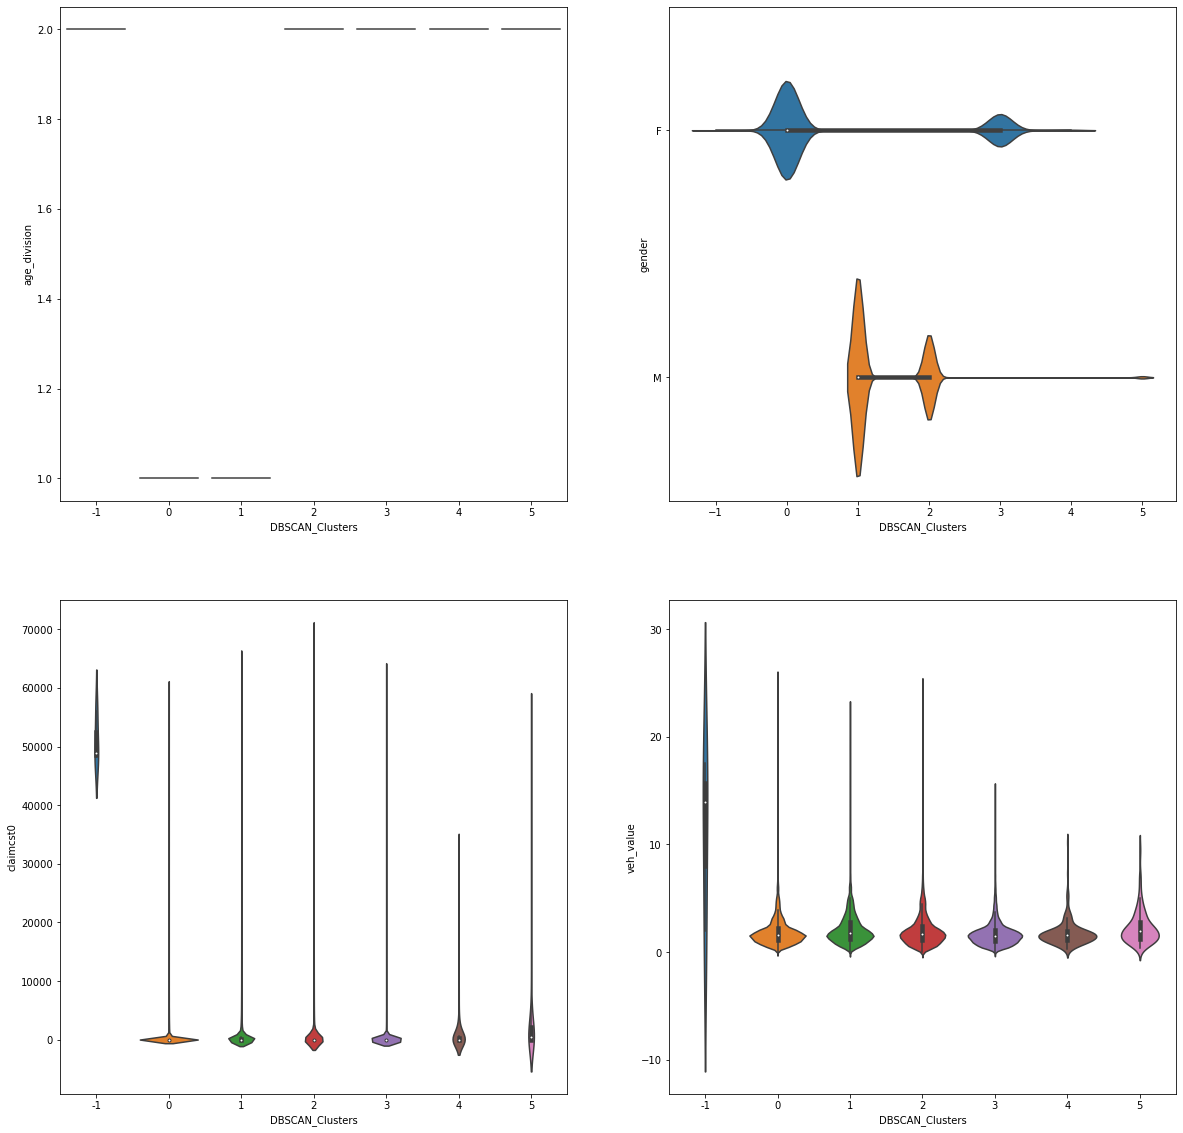

In [33]:
fig, axes = plt.subplots(2, 2, figsize = (20,20))

ax = sns.violinplot(data = ap_final, x = "DBSCAN_Clusters", y = "age_division", ax=axes[0,0])
ax = sns.violinplot(data = ap_final, x = "DBSCAN_Clusters", y = "gender", ax=axes[0,1])
ax = sns.violinplot(data = ap_final, x = "DBSCAN_Clusters", y = "claimcst0", ax=axes[1,0])
ax = sns.violinplot(data = ap_final, x = "DBSCAN_Clusters", y = "veh_value", ax=axes[1,1])

In [38]:
ap_final.groupby(['DBSCAN_Clusters']).age_division.value_counts() # displaying the summary statistics for age

DBSCAN_Clusters  age_division
-1               2                   3
 0               1               22515
 1               1               15897
 2               2                6781
 3               2                7386
 4               2                 227
 5               2                 180
Name: age_division, dtype: int64

In [35]:
ap_final.groupby(['DBSCAN_Clusters']).gender.value_counts() # displaying the summary statistics for gender

DBSCAN_Clusters  gender
-1               F             3
 0               F         22515
 1               M         15897
 2               M          6781
 3               F          7386
 4               F           227
 5               M           180
Name: gender, dtype: int64

In [36]:
ap_final.groupby(['DBSCAN_Clusters']).claimcst0.sum() # displaying the summary statistics for claim cost

DBSCAN_Clusters
-1    1.532305e+05
 0    7.421505e+06
 1    1.442938e+07
 2    7.628361e+06
 3    3.105100e+06
 4    2.591745e+05
 5    5.411604e+05
Name: claimcst0, dtype: float64

In [37]:
ap_final.groupby(['DBSCAN_Clusters']).veh_value.sum() # displaying the summary statistics for vehicle value

DBSCAN_Clusters
-1       33.47300
 0    42062.60927
 1    34240.74346
 2    13540.41524
 3    12726.44758
 4      402.32511
 5      412.69965
Name: veh_value, dtype: float64

My interpretation is that these clusterings are informative, but not very clear. With an eps of 0.5 and minpts of 8, I got a better and highest silhouette score of 0.480339 with a total number of 7 clusters.

Cluster -1 has older female (whose age is above 40 years), low claim cost history and low vehicle value.

Cluster 0 has younger female (whose age is below 40 years), high claim cost history and high vehicle value.

Cluster 1 has younger male (whose age is below 40 years), low claim cost history and high vehicle value.

Cluster 2 has older male (whose age is above 40 years), high claim cost history and median vehicle value.

Cluster 3 has older female (whose age is above 40 years), average claim cost history and median vehicle value.

Cluster 4 has older female (whose age is above 40 years), average claim cost history and low vehicle value.

Cluster 5 has older male (whose age is above 40 years), high claim cost history and low vehicle value.


I conclude that, even though DBSCAN algorithm gives 7 clusters, I recommend going with Kmeans (k = 4) clusters in this case, as it's more simple and informative as well.